# This script is a playground to get familiar with Mitsuba simulator and render basic object and normal map (single view)

In [1]:
import mitsuba as mi
import matplotlib.pyplot as plt
import drjit as dr

In [2]:
mi.variants()
mi.set_variant('scalar_rgb')

In [3]:
scene = mi.load_file("scenes/my_cube.xml")


In [4]:
img = mi.render(scene, spp=256)

print(f"rendering output shape: {img.shape}")

rendering output shape: (256, 256, 7)


In [5]:
# plt.axis("off")
# plt.imshow(img/0.5 + 0.5)
# # plt.imshow(img ** (1.0 / 2.2)); # approximate sRGB tonemapping

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


depth range: min 0.0, max: 0.535516083240509
image range: min 0.0, max: 24.95600128173828
normal range: min {dr.min(normal)}, max: {dr.max(normal)}


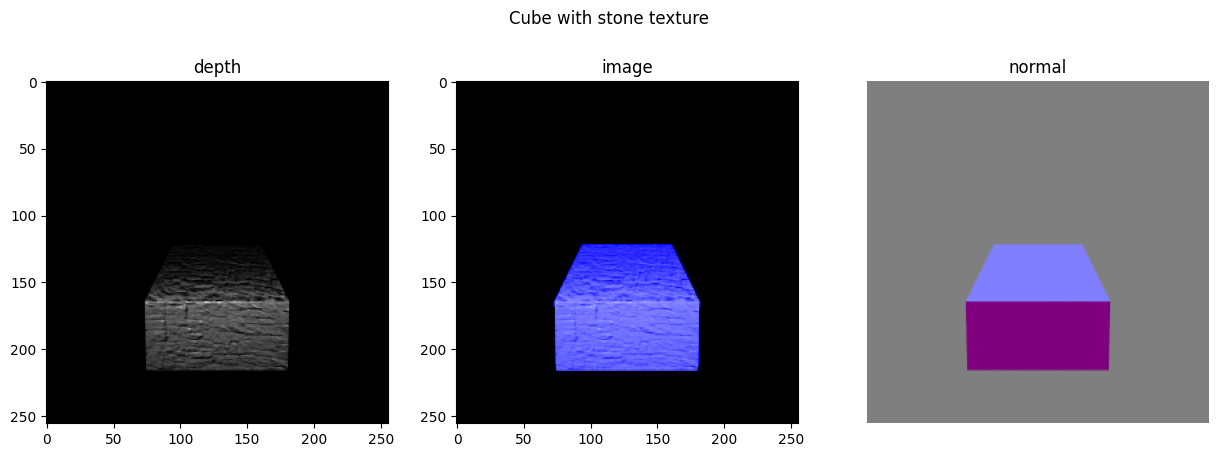

In [6]:
if img.shape[-1] > 0:
    depth = img[..., 0]
    print(f"depth range: min {dr.min(depth)}, max: {dr.max(depth)}")
if img.shape[-1] >= 4:
    image = img[..., 1:4]
    print(f"image range: min {dr.min(image)}, max: {dr.max(image)}")
if img.shape[-1] >= 7:
    normal = img[..., 4:8]
    print("normal range: min {dr.min(normal)}, max: {dr.max(normal)}")


# plot the rendering
# create a 1x3 subplot
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(depth, cmap="gray"); axes[0].set_title("depth")
axes[1].imshow(image ** (1.0 / 2.2)); axes[1].set_title("image") # approximate sRGB tonemapping
axes[2].imshow(normal*0.5+0.5); axes[2].set_title("normal") # map [-1, 1] -> [0, 1]
plt.axis("off")
plt.suptitle("Cube with stone texture")
plt.savefig("cube_stone_texture.png")
plt.show()

# # save the rendered img
# mi.util.write_bitmap("my_first_render.png", img)

In [7]:
params = mi.traverse(scene)
print(params)

SceneParameters[
  ------------------------------------------------------------------------------------------------------
  Name                                               Flags    Type        Parent
  ------------------------------------------------------------------------------------------------------
  sensor.near_clip                                            float       PerspectiveCamera
  sensor.far_clip                                             float       PerspectiveCamera
  sensor.shutter_open                                         float       PerspectiveCamera
  sensor.shutter_open_time                                    float       PerspectiveCamera
  sensor.film.size                                            Vector2u    HDRFilm
  sensor.film.crop_size                                       Vector2u    HDRFilm
  sensor.film.crop_offset                                     Point2u     HDRFilm
  sensor.x_fov                                       ∂, D     float       Pers

# Conclusion: we are able to create an object and add a 3D texture map to it. However, the 3D texture map is only considered during rendering, but does not change the geometry of the object.
Therefore, if we really want to set it up in simulation, we should use high-res meshes instead of a basic mesh + a texture map.

# 2023-09-08 Try to load high-res 3D mesh downloaded from online platform that has realistic geometry

In [8]:
import mitsuba as mi
import matplotlib.pyplot as plt
import drjit as dr

mi.variants()
mi.set_variant('scalar_rgb')

rendering output shape: (1048, 1048, 7)
image range: min 0.0, max: 0.23602111637592316
depth range: min 0.0, max: 28.479995727539062
normal range: min -0.9999876618385315, max: 0.9999966621398926


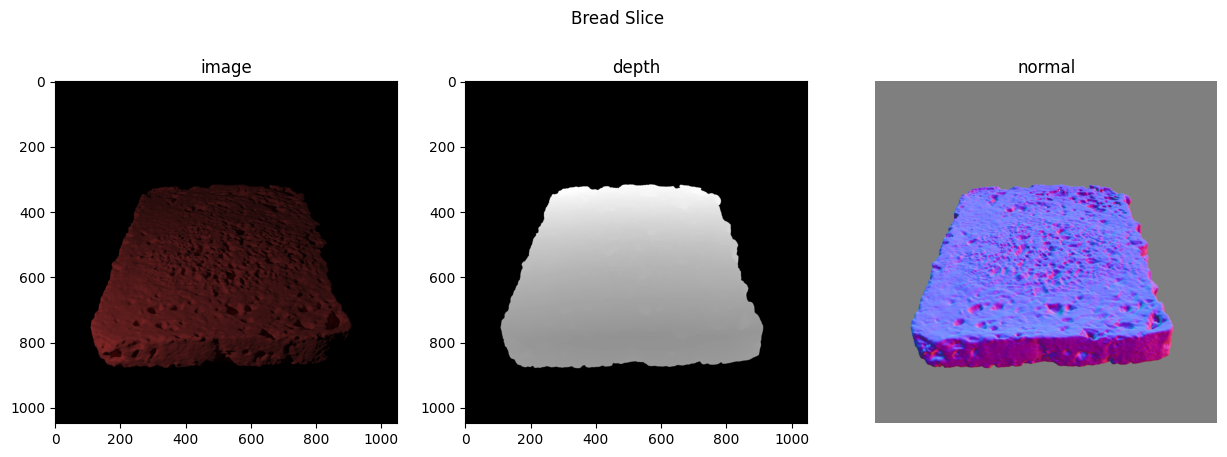

In [9]:
scene = mi.load_file("scenes/my_breadslice.xml")
img = mi.render(scene, spp=512)

print(f"rendering output shape: {img.shape}")

image = img[..., :3]
print(f"image range: min {dr.min(image)}, max: {dr.max(image)}")
depth = img[..., 3]
print(f"depth range: min {dr.min(depth)}, max: {dr.max(depth)}")
normal = img[..., 4:8]
print(f"normal range: min {dr.min(normal)}, max: {dr.max(normal)}")

# plot the rendering
# create a 1x3 subplot
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(image ** (1.0 / 2.2)); axes[0].set_title("image") # approximate sRGB tonemapping
axes[1].imshow(depth, cmap="gray"); axes[1].set_title("depth")
axes[2].imshow(normal*0.5+0.5); axes[2].set_title("normal") # map [-1, 1] -> [0, 1]
plt.axis("off")
plt.suptitle("Bread Slice")
plt.savefig("breadslice.png")
plt.show()

# # save the rendered img
# mi.util.write_bitmap("my_first_render.png", img)